# Hydrothermal Venture

## Part 1

In [2]:
test_data = (
"""0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2""")
test_data = test_data.splitlines()

with open("05_input.txt", "r") as f:
    full_data = f.read()
    full_data = full_data.splitlines()

In [60]:
from PIL import Image, ImageDraw, ImageChops
import numpy as np


def _interpret_line(line):
    a, _, b = line.split()
    x1, y1 = (int(n) for n in a.split(","))
    x2, y2 = (int(n) for n in b.split(","))
    return ((x1, y1), (x2, y2))

def calculate_overlaps(data, use_diagonals=False):
    # TODO: Automatically find needed size
    mode = "L"
    size = (1000, 1000)
    
    sea_floor = Image.new(mode, size)

    for line in data:
        venture = Image.new(mode, size)
        drawing_context = ImageDraw.Draw(venture)
        a, b = _interpret_line(line)
        
        if (a[0] == b[0] or a[1] == b[1]):
            drawing_context.line((a, b), fill=1, width=1)
        elif use_diagonals:
            drawing_context.line((a, b), fill=1, width=1)
        
        sea_floor = ImageChops.add(sea_floor, venture)
        
    crossing_vent_points = sum(sea_floor.histogram()[2:])
    print(f"We have {crossing_vent_points} points where multiple vents cross.")
    maximum = sea_floor.getextrema()[1]
    print(f"The highest crossing count in a single point is: {maximum}")
    preview_image = Image.eval(sea_floor, lambda x: x * 256/maximum)
    display(preview_image)


We have 5774 points where multiple vents cross.
The highest crossing count in a single point is: 4


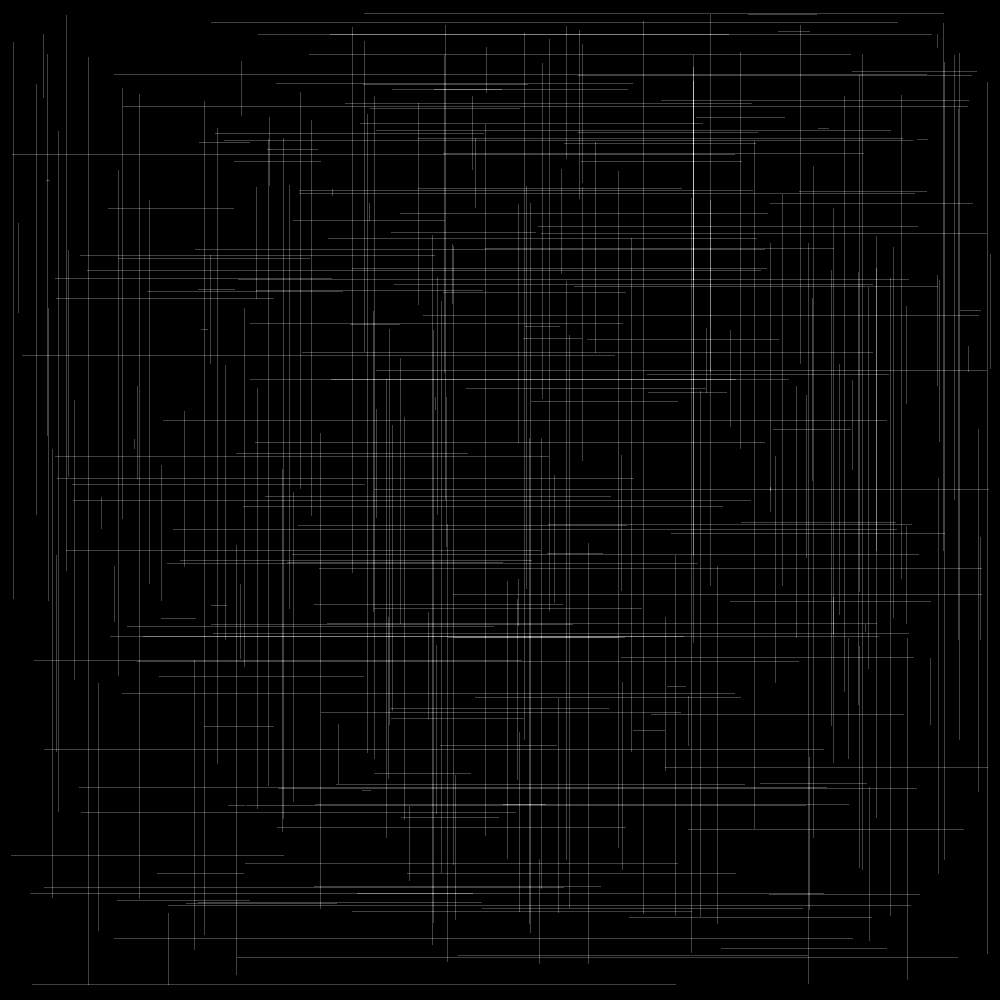

In [58]:
calculate_overlaps(full_data, use_diagonals=False)

## Part 2
Now also consider the diagonal lines.

We have 18423 points where multiple vents cross.
The highest crossing count in a single point is: 5


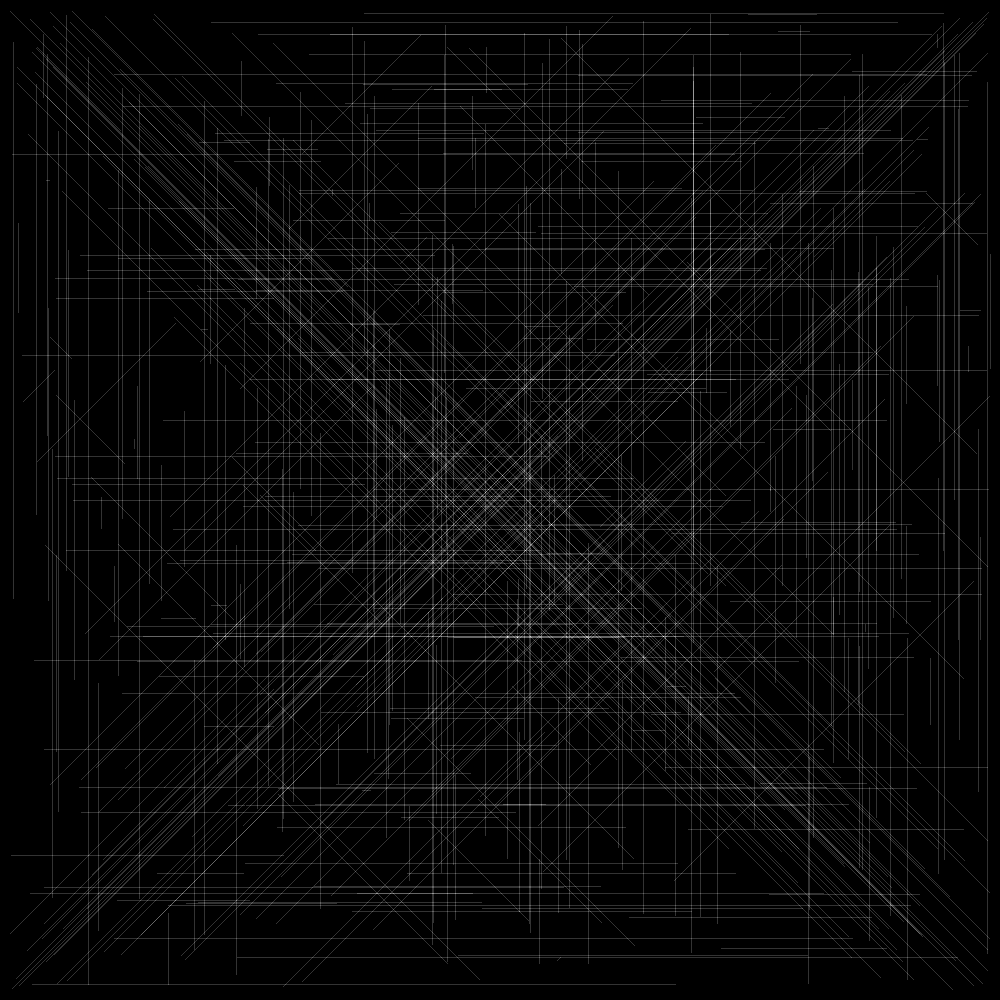

In [59]:
calculate_overlaps(full_data, use_diagonals=True)